## Analysing and understanding the AUC curve using a classification problem statement 

In [2]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns


In [3]:
# importing the data 

data=pd.read_csv('loan.csv')

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# dropping the unwated columns from the data 

data=data.drop('Loan_ID',axis=1)

In [6]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
# deriving the null value information from the data 
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# null valule imputation based on the data type of the column

data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [11]:
# deriving the null value information from the data 
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# Categorical encoding the features 

categorical_features=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [13]:
# using get dummies encoding to encode the features as there is not inherent hierarchy and rank in the columns

data=pd.get_dummies(data=data,columns=categorical_features,drop_first=True)

In [14]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,Y,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,Y,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,Y,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,Y,1,1,0,1,0,0,0,0,1


In [15]:
# label encoding the targte feature as we need one column for the target 

from sklearn.preprocessing import LabelEncoder

In [16]:
encoder=LabelEncoder()

In [17]:
data['Loan_Status']=encoder.fit_transform(data['Loan_Status'])

In [18]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,1,0,1,0,0,0,0,1


In [19]:
# seperating the feature and the target set for further analysis 

In [20]:
X=data.drop('Loan_Status',axis=1)

In [21]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [22]:
y=data['Loan_Status']

In [23]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [24]:
# scaling the featuresusing the standard scaler as dufferent units of measurements are present in the data with income , amount and term

from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
X_sc=scaler.fit_transform(X) 

# fit = learns the inherent properties of the column and
#transform = then applies the standard normalisation on the data 





In [27]:
X_sc

array([[ 0.07299082, -0.55448733, -0.21124125, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [-0.13441195, -0.03873155, -0.21124125, ..., -0.39260074,
        -0.7820157 , -0.70020801],
       [-0.39374734, -0.55448733, -0.94899647, ...,  2.54711697,
        -0.7820157 ,  1.42814704],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.35706382, -0.55448733,  0.49081614, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [-0.13441195, -0.55448733, -0.15174486, ...,  2.54711697,
         1.2787467 , -0.70020801]])

In [29]:
# converting the scaled X into a data frame

scaled_x=pd.DataFrame(data=X_sc,columns=X.columns)

In [30]:
scaled_x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.889500,0.273231,0.411733,-2.117107,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
610,-0.212557,-0.554487,-1.258378,-2.522836,0.411733,0.472343,0.728816,-0.446339,-0.443713,3.322532,-0.528362,-0.392601,-0.782016,-0.700208
611,0.437174,-0.472404,1.276168,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
612,0.357064,-0.554487,0.490816,0.273231,0.411733,0.472343,0.728816,-0.446339,2.253710,-0.300975,-0.528362,-0.392601,-0.782016,1.428147


In [53]:
# splitting the data set into training and testing data 

from sklearn.model_selection import train_test_split

In [54]:
xtrain,xtest,ytrain, ytest=train_test_split(scaled_x,y,test_size=0.2,random_state=10)

In [55]:
# importing the different classifiers for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report

## When to use a tree and when to use a forest !!!

- A decision tree is more simple and interpretable but prone to overfitting, but a random forest is complex and prevents the risk of overfitting.

- Random forest is a more robust and generalized performance on new data, widely used in various domains such as finance, healthcare, and deep learning.


In [56]:
def model(xtrain ,xtest , ytrain ,ytest):
    
    model1=LogisticRegression()
    model1=model1.fit(xtrain ,ytrain)
    predict1=model1.predict(xtest)
    print('the classification report for logistic regression is:\n\n',classification_report(ytest, predict1))
    
    model2=SVC()
    model2=model2.fit(xtrain, ytrain)
    predict2=model2.predict(xtest)
    print('the classification report for support vector machine is:\n\n',classification_report(ytest, predict2))
    
    model3=DecisionTreeClassifier()
    model3=model3.fit(xtrain, ytrain)
    predict3=model3.predict(xtest)
    print('the classification report for decision tree is:\n\n',classification_report(ytest, predict3))
    
    model4=RandomForestClassifier()
    model4=model4.fit(xtrain, ytrain)
    predict4=model4.predict(xtest)
    print('the classification report for random forest classifier is:\n\n',classification_report(ytest, predict4))
    
    

In [57]:
model(xtest , xtrain , ytest , ytrain)

the classification report for logistic regression is:

               precision    recall  f1-score   support

           0       0.72      0.54      0.62       156
           1       0.81      0.90      0.85       335

    accuracy                           0.79       491
   macro avg       0.76      0.72      0.73       491
weighted avg       0.78      0.79      0.78       491

the classification report for support vector machine is:

               precision    recall  f1-score   support

           0       0.88      0.42      0.57       156
           1       0.78      0.97      0.87       335

    accuracy                           0.80       491
   macro avg       0.83      0.70      0.72       491
weighted avg       0.81      0.80      0.77       491

the classification report for decision tree is:

               precision    recall  f1-score   support

           0       0.50      0.50      0.50       156
           1       0.77      0.77      0.77       335

    accuracy     

## From the above we can see that Support vector machine is performing the best this means that the target varibles are easily seperabel through a imaginary line / plane for classification 


## AUC curve analysis

In [61]:
# predicting the probabilites 

final_model=SVC(probability=True) # this is necessary for probabilities 
final_model=final_model.fit(xtrain , ytrain)
final_prediction=final_model.predict(xtest)
print('the classification report for support vector machine is:\n\n',classification_report(ytest, final_prediction))

the classification report for support vector machine is:

               precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123



In [62]:
# getting the probabilities for AUC

probs=final_model.predict_proba(xtest)

In [65]:
from sklearn.metrics import roc_curve # import roc
from sklearn.metrics import roc_auc_score

In [66]:
# roc curve for models

fpr1, tpr1, thresh1 = roc_curve(ytest, probs[:,1], pos_label=1)
auc_score1 = roc_auc_score(ytest, probs[:,1])

In [67]:
print(auc_score1)

0.6580459770114943


In [68]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

Text(0, 0.5, 'True Positive rate')

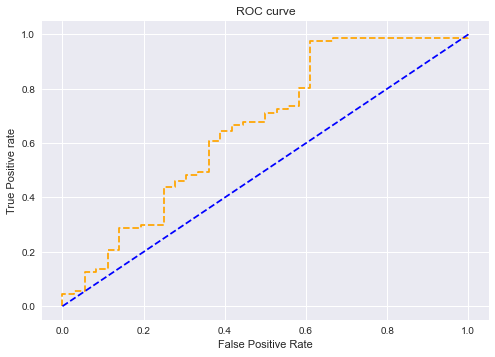

In [70]:
# plot roc curves

import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

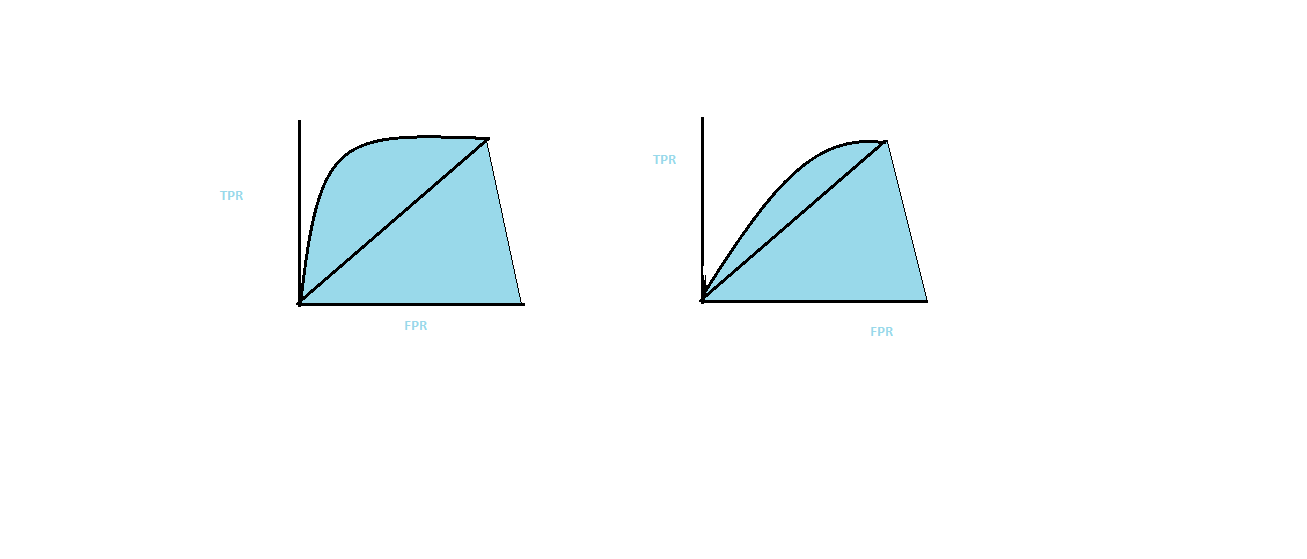

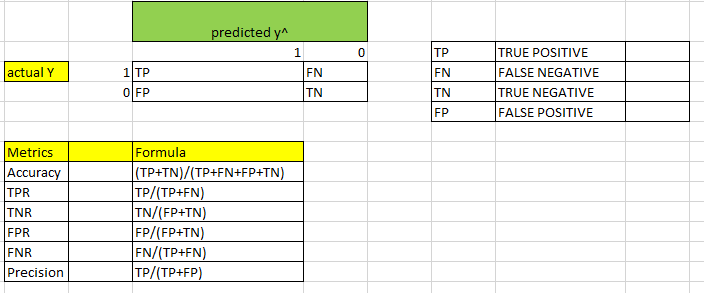